# Deep Learning

## Redes neuronales

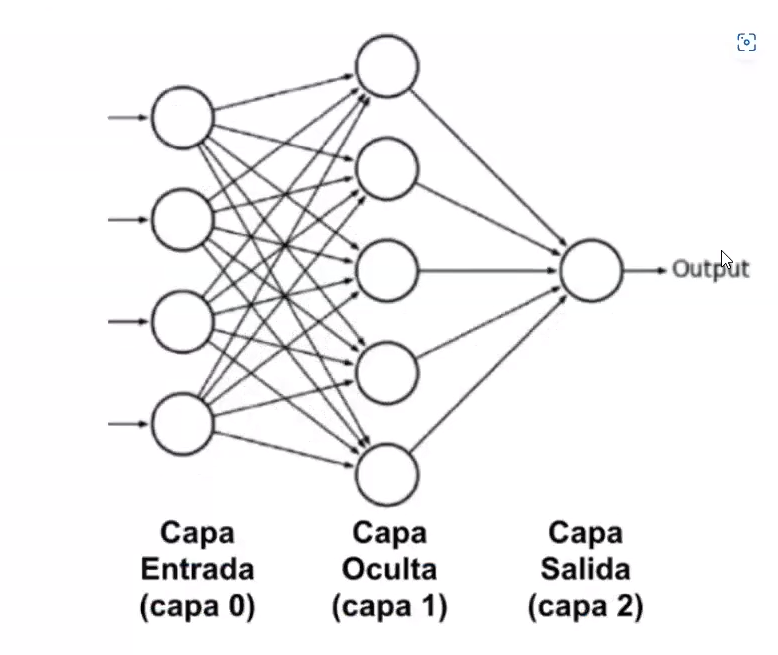

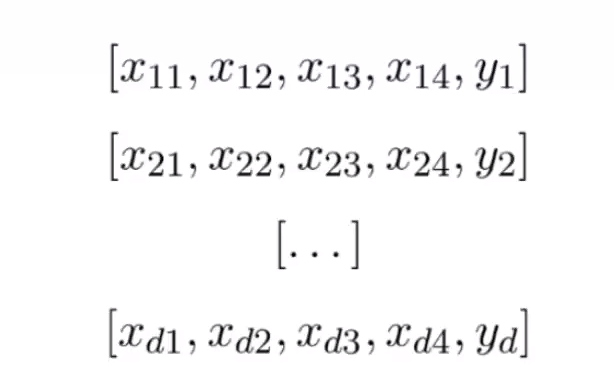

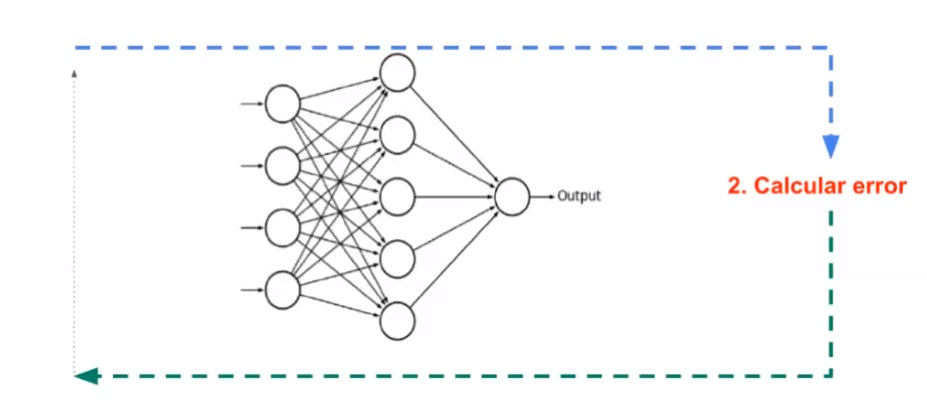

## Función Sigmoide

# $$ f(x) = \frac{1}{1+\epsilon^{-x}} $$
# $$ f'(x) = x(1-x) $$

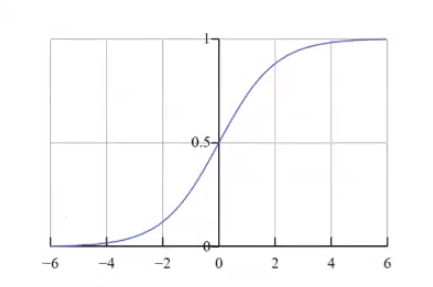

## Tangente Hiperbolica

# $$ f(x) = \frac{\epsilon^z - \epsilon^{-z}}{\epsilon^z + \epsilon^{-z}} $$

# $$ f'(x) = 1 - f(x)^2 $$

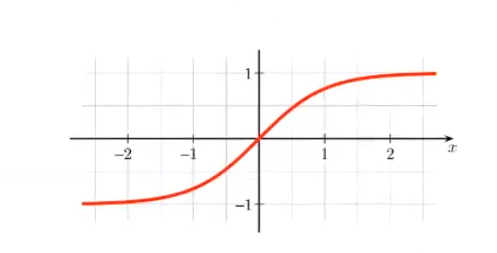

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X,y=data.data,data.target

## Generador de vistas - Taller 09

In [4]:
# Función Sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Aplicar la función sigmoide a los datos
sigmoid_output = sigmoid(X)

# Tangente Hiperbólica
def tanh(x):
    return np.tanh(x)

# Aplicar la función tangente hiperbólica a los datos
tanh_output = tanh(X)

In [5]:
print(sigmoid(X))

[[0.99999998 0.99996895 1.         ... 0.56596327 0.6130379  0.52969003]
 [1.         0.99999998 1.         ... 0.5463664  0.56831998 0.52224031]
 [1.         1.         1.         ... 0.56045282 0.58935509 0.52188102]
 ...
 [0.99999994 1.         1.         ... 0.53539072 0.55522379 0.51954004]
 [1.         1.         1.         ... 0.565865   0.60077612 0.53096034]
 [0.99957373 1.         1.         ... 0.5        0.57128602 0.51759024]]


In [6]:
print(tanh(X))

[[1.         1.         1.         ... 0.25933936 0.43016571 0.11834285]
 [1.         1.         1.         ... 0.18388432 0.26827118 0.08878559]
 [1.         1.         1.         ... 0.23832737 0.3463586  0.08735676]
 ...
 [1.         1.         1.         ... 0.14085718 0.21823301 0.07804099]
 [1.         1.         1.         ... 0.25896622 0.38736831 0.12336834]
 [0.99999964 1.         1.         ... 0.         0.27946347 0.07027397]]


In [7]:
X.shape

(569, 30)

In [8]:
y.shape

(569,)

In [9]:
X=data.data[:,:4]

In [10]:
X.shape

(569, 4)

In [11]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [12]:
X[:20]

array([[  17.99,   10.38,  122.8 , 1001.  ],
       [  20.57,   17.77,  132.9 , 1326.  ],
       [  19.69,   21.25,  130.  , 1203.  ],
       [  11.42,   20.38,   77.58,  386.1 ],
       [  20.29,   14.34,  135.1 , 1297.  ],
       [  12.45,   15.7 ,   82.57,  477.1 ],
       [  18.25,   19.98,  119.6 , 1040.  ],
       [  13.71,   20.83,   90.2 ,  577.9 ],
       [  13.  ,   21.82,   87.5 ,  519.8 ],
       [  12.46,   24.04,   83.97,  475.9 ],
       [  16.02,   23.24,  102.7 ,  797.8 ],
       [  15.78,   17.89,  103.6 ,  781.  ],
       [  19.17,   24.8 ,  132.4 , 1123.  ],
       [  15.85,   23.95,  103.7 ,  782.7 ],
       [  13.73,   22.61,   93.6 ,  578.3 ],
       [  14.54,   27.54,   96.73,  658.8 ],
       [  14.68,   20.13,   94.74,  684.5 ],
       [  16.13,   20.68,  108.1 ,  798.8 ],
       [  19.81,   22.15,  130.  , 1260.  ],
       [  13.54,   14.36,   87.46,  566.3 ]])

- Nota: Para entrenar modelos de deep learning las variables deben estar en la misma escala.

- Aplicaremos estandarización a las variables.

In [13]:
from sklearn.preprocessing import StandardScaler
x_estandarizador=StandardScaler()
X_std=x_estandarizador.fit_transform(X)

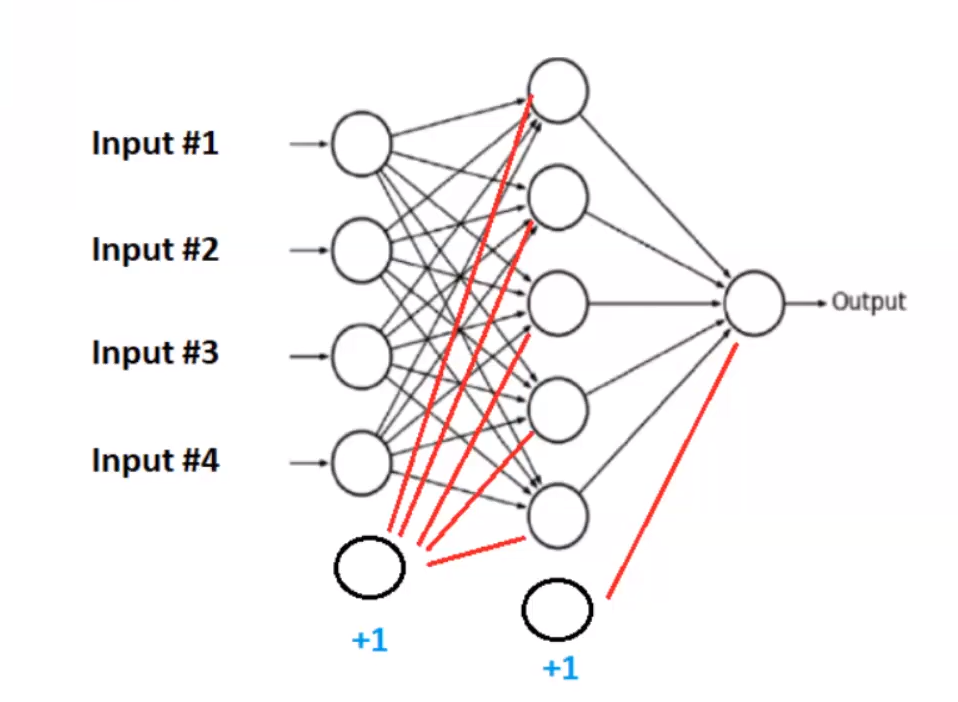

Definiendo una clase Layer (capa):

- Parametros, entrada, dalida, función activación
- generar pesos aleatorios

In [14]:
class Layer:
    def __init__(self,dim_input,dim_output,fn_activation,nombre):
        self.dim_input=dim_input
        self.dim_output=dim_output
        self.generar_pesos((dim_output,dim_input))
        self.generar_bias(dim_output)
        self.fn_activation=fn_activation
        self.nombre=nombre
    
    def __repr__(self):
        return """
        Capa {}. tamaño input:{}. tamaño output: {}.
        pesos: {}
        bias: {}
        """.format(self.nombre,self.dim_input,self.dim_output,self.w,self.b)
    
    def generar_pesos(self,dimensiones):
        self.w=np.random.random(dimensiones)
        
    def generar_bias(self,dim_output):
        self.b=np.random.random((dim_output,))
        
    def activar(self,x):
        return self.fn_activation(self.w @ x + self.b)

In [15]:
def fn_sigmoide(x):
    return 1/(1+np.exp(-x))

In [16]:
n_input=4
n_oculta=5
n_output=1

In [17]:
capa_oculta=Layer(n_input,n_oculta,fn_sigmoide, "Oculta")
capa_salida=Layer(n_oculta,n_output,fn_sigmoide, "Salida")

In [18]:
print(capa_oculta)


        Capa Oculta. tamaño input:4. tamaño output: 5.
        pesos: [[0.83411727 0.59017235 0.84920306 0.36582029]
 [0.59237257 0.05365739 0.49634975 0.81674036]
 [0.18772516 0.16498052 0.63968369 0.70781114]
 [0.35465966 0.69580818 0.62977774 0.80475126]
 [0.15042177 0.88829683 0.66005311 0.61972286]]
        bias: [0.48106761 0.58134678 0.58123503 0.69770004 0.20298336]
        


In [19]:
print(capa_salida)


        Capa Salida. tamaño input:5. tamaño output: 1.
        pesos: [[0.93917691 0.52697838 0.2081241  0.2760015  0.91069784]]
        bias: [0.75563616]
        


### Creando red neuronal, lista con las capas, metodo propagación hacia adelante.

In [20]:
class RedNeuronal:
    def __init__(self):
        self.layers=[]
        
    def add_layer(self,layer):
        self.layers.append(layer)
    
    def forward(self,x):
        print("""input{}""".format(x))
        for layer in self.layers:
            x=layer.activar(x)
            print(layer)
            print("""output{}""".format(x))
        return x

In [21]:
red = RedNeuronal()
red.add_layer(capa_oculta)
red.add_layer(capa_salida)

In [22]:
indice_aleatorio=np.random.permutation(X.shape[0])
x0=X_std[indice_aleatorio[0]]
y0=y[indice_aleatorio[0]]
print(x0,y0)

[-1.57068136 -0.16048584 -1.56024497 -1.23345631] 1


In [23]:
red.forward(x0)

input[-1.57068136 -0.16048584 -1.56024497 -1.23345631]

        Capa Oculta. tamaño input:4. tamaño output: 5.
        pesos: [[0.83411727 0.59017235 0.84920306 0.36582029]
 [0.59237257 0.05365739 0.49634975 0.81674036]
 [0.18772516 0.16498052 0.63968369 0.70781114]
 [0.35465966 0.69580818 0.62977774 0.80475126]
 [0.15042177 0.88829683 0.66005311 0.61972286]]
        bias: [0.48106761 0.58134678 0.58123503 0.69770004 0.20298336]
        
output[0.06297529 0.10531331 0.16641988 0.12496199 0.12237965]

        Capa Salida. tamaño input:5. tamaño output: 1.
        pesos: [[0.93917691 0.52697838 0.2081241  0.2760015  0.91069784]]
        bias: [0.75563616]
        
output[0.74093915]


array([0.74093915])

# Creación de red neuronal - Taller 09

In [33]:
from scipy.special import expit

In [35]:
class Layer:
    def __init__(self, dim_input, dim_output, fn_activation, nombre):
        self.dim_input = dim_input
        self.dim_output = dim_output
        self.generar_pesos((dim_output, dim_input))
        self.generar_bias(dim_output)
        self.fn_activation = fn_activation
        self.nombre = nombre

    def __repr__(self):
        return """
        Capa {}. tamaño input: {}. tamaño output: {}.
        pesos: {}
        bias: {}
        """.format(self.nombre, self.dim_input, self.dim_output, self.w, self.b)

    def generar_pesos(self, dimensiones):
        self.w = np.random.random(dimensiones)

    def generar_bias(self, dim_output):
        self.b = np.random.random((dim_output,))

    def activar(self, x):
        return self.fn_activation(self.w @ x + self.b)

class NeuralNetwork:
    def __init__(self):
        self.layers = []

    def agregar_capa(self, dim_input, dim_output, fn_activation, nombre):
        layer = Layer(dim_input, dim_output, fn_activation, nombre)
        self.layers.append(layer)

    def __repr__(self):
        return "Red Neuronal:\n" + "\n".join([str(layer) for layer in self.layers])

    def activar_red(self, x):
        for layer in self.layers:
            x = layer.activar(x)
        return x

# Crear una red neuronal
red_neuronal = NeuralNetwork()

# Agregar capas a la red neuronal
red_neuronal.agregar_capa(2, 3, np.tanh, "Capa 1")
red_neuronal.agregar_capa(3, 1, expit, "Capa 2")


print(red_neuronal)

entrada = np.array([0.5, 0.7])
salida = red_neuronal.activar_red(entrada)
print("Salida de la red neuronal:", salida)

Red Neuronal:

        Capa Capa 1. tamaño input: 2. tamaño output: 3.
        pesos: [[0.39019314 0.27100711]
 [0.77378185 0.31988277]
 [0.38766519 0.36194521]]
        bias: [0.29107649 0.77678388 0.20213274]
        

        Capa Capa 2. tamaño input: 3. tamaño output: 1.
        pesos: [[0.00536401 0.13352687 0.5588396 ]]
        bias: [0.66728475]
        
Salida de la red neuronal: [0.75166609]
